In [1]:
import pandas as pd
import math as m
from scipy import stats
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import  metrics
from itertools import product
from datetime import datetime, date, time
import calendar
%pylab inline

/home/vladimir/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


/home/vladimir/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product', 'time', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
data = pd.read_csv('trade_data.csv')

In [3]:
data.loc[len(data)] = ['02.03.18', 0, 0, 0, 0, 0 ,0 ,0 ,0]

In [4]:
data[-10:]

,DATE,OPEN,HIGH,LOW,CLOSE,WAP,LTTIME,VALUE,NUMTRADES
144,16.02.18,7.39,7.41,7.10,7.10,7.36,19:42:53,56239609000,275
145,19.02.18,7.40,7.43,7.00,7.00,7.36,19:40:53,54464443000,245
146,20.02.18,7.40,7.44,6.55,6.56,7.25,19:36:32,69780141000,291
147,21.02.18,7.35,7.40,6.51,6.70,7.16,20:08:00,60339491000,257
148,22.02.18,7.30,7.50,7.16,7.21,7.23,20:09:05,53151449000,182
149,26.02.18,7.25,7.50,7.05,7.05,7.30,19:41:39,61576300000,221
150,27.02.18,7.40,7.50,6.40,6.40,7.35,19:33:28,64882758000,262
151,28.02.18,7.40,7.60,6.75,7.25,7.39,20:14:04,65498153519,228
152,01.03.18,7.25,7.50,6.85,6.85,7.38,19:45:15,65880295481,257
153,02.03.18,0.00,0.00,0.00,0.00,0.00,0,0,0


In [5]:
#Обработаем время
#Create by Asim
from datetime import datetime, date, time
k = 0
data['DAY'] = 0
data['MONTH'] = 0
date = []
for i in data.DATE:
    d = datetime.strptime(i,'%d.%m.%y')
    date.append(d)
    data.loc[k,'DAY'] = datetime.isoweekday(d)
    data.loc[k,'MONTH'] = d.month
    k = k + 1
data.index = date
data.drop('DATE', axis =1, inplace=True)
data.head()

,OPEN,HIGH,LOW,CLOSE,WAP,LTTIME,VALUE,NUMTRADES,DAY,MONTH
2017-07-24,9.11,9.15,8.50,8.55,8.97,NaN,2325011000,37,1,7
2017-07-25,9.09,9.10,8.81,8.81,9.02,NaN,3477388000,31,2,7
2017-07-26,9.06,9.35,9.05,9.10,9.15,NaN,6537394000,36,3,7
2017-07-27,9.17,9.40,9.17,9.25,9.30,NaN,3387899000,26,4,7
2017-07-28,9.31,9.32,9.20,9.20,9.26,NaN,4659405000,31,5,7


In [6]:
#добавим target
target = []
target.append(1)#просто так как он первый ----?-----
for i in range(1, len(data)):
    if data.WAP[i] > data.WAP[i-1]:
        target.append(1)
    else:
        target.append(0)
data['target'] = target
data[-10:]

,OPEN,HIGH,LOW,CLOSE,WAP,LTTIME,VALUE,NUMTRADES,DAY,MONTH,target
2018-02-16,7.39,7.41,7.10,7.10,7.36,19:42:53,56239609000,275,5,2,1
2018-02-19,7.40,7.43,7.00,7.00,7.36,19:40:53,54464443000,245,1,2,0
2018-02-20,7.40,7.44,6.55,6.56,7.25,19:36:32,69780141000,291,2,2,0
2018-02-21,7.35,7.40,6.51,6.70,7.16,20:08:00,60339491000,257,3,2,0
2018-02-22,7.30,7.50,7.16,7.21,7.23,20:09:05,53151449000,182,4,2,1
2018-02-26,7.25,7.50,7.05,7.05,7.30,19:41:39,61576300000,221,1,2,1
2018-02-27,7.40,7.50,6.40,6.40,7.35,19:33:28,64882758000,262,2,2,1
2018-02-28,7.40,7.60,6.75,7.25,7.39,20:14:04,65498153519,228,3,2,1
2018-03-01,7.25,7.50,6.85,6.85,7.38,19:45:15,65880295481,257,4,3,0
2018-03-02,0.00,0.00,0.00,0.00,0.00,0,0,0,5,3,0


Удалим Выброс

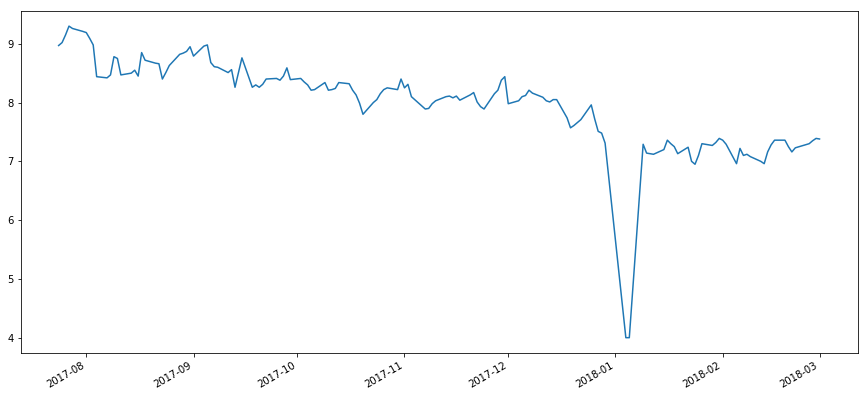

In [7]:
plt.figure(figsize(15,7))
data.WAP[:-1].plot()

In [8]:
data = pd.concat([data[:'2017-12-27'],data['2018-01-10':] ], axis = 0)

In [9]:
data.shape

(149, 11)

(array([73.,  0., 76.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

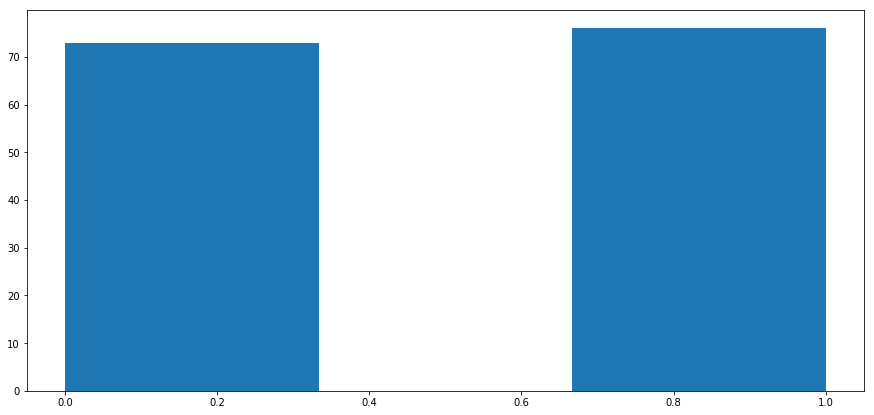

In [10]:

plt.hist(data.target, bins=3)

## Сгенерируем новые данные

#### ЛАГИ

In [11]:
#Функция на вход получает DataFrame с панельными данными
#Возвращает DataFrame с лагами
def time_series_to_DataFrame(data, lags, target):
    lags = list(map(lambda x: x+1, lags))
    #Готовим название колонок
    columns = []
    for i in range(len(data.columns)):
        #print (i , lags[i])
        for j in range(1, lags[i]):
            #print ('i = ', i,'j = ',j)
            #print (columns)
            columns.append(data.columns[i] + '_lag_' + str(j))
    columns.append(target)
    #готовим target
    target = pd.DataFrame(data[target].values[max(lags)-1:])
    #готовим индексы
    index = data.index
    
    
    data = data.values
    
    new_data = []
    for i in range(max(lags)-1,len(data)):
        res = []
        for lag in range(len(lags)):
            for j in range(1,lags[lag]):
                res.append(data[i-j][lag])
        new_data.append(res)
    
    
    new_data = pd.DataFrame(new_data)
    new_data = pd.concat([new_data, target], axis = 1)
    new_data.columns = columns
    new_data.index = index[max(lags)-1:]
    return new_data

### Процентное изменение

In [12]:
def percent_change(data, lag, target, percent = None):
    lag += 1
    new_data = []
    new_DataFrame = pd.DataFrame()
    new_DataFrame[target] = data[target][lag:]
    new_DataFrame.index = data.index[lag:]
    for i in range( lag ,len(data)):
        res = []
        for j in range(1,lag):
            if percent == True:
                res.append(data[target][i-j]/data[target][i-j-1] * 100 - 100)
            else:
                res.append(data[target][i-j]/data[target][i-j-1])
        new_data.append(res)
    import numpy as np
    new_data = np.array(new_data)
    new_data = new_data.transpose()
    for i in range(1, lag):
        new_DataFrame[target + '_percent_change_' + str(i)] = new_data[i-1]
    new_DataFrame.drop(target, axis = 1, inplace=True)
    return new_DataFrame

In [13]:
def percent_change_DataFrame(data, list_of_percent_change, percent = None):
    shape = []
    for i in list_of_percent_change:
        shape.append(i[1])
    shape = max(shape)
    shape = len(data) - shape - 1
    
    data_percent_change = pd.DataFrame()
    data_percent_change['target'] = data.target[-shape:]
    data_percent_change.index = data.index[-shape:]
    
    for i in list_of_percent_change:
        DataFrame = percent_change(data, i[1], i[0], percent)
        data_percent_change = pd.concat([data_percent_change, DataFrame[-shape:]], axis = 1 )
    data_percent_change.drop('target', axis = 1, inplace=True)
    return data_percent_change

### скользящие среднее

In [14]:
def moving_average(data, lag, target):
    averege = []
    new_DataFrame = pd.DataFrame()
    for i in range(lag,len(data[target])):
        sum_ = 0
        for j in range(1, lag + 1):
            sum_ += data[target][i - j]
        averege.append(sum_/(lag))
    new_DataFrame[target + '_averege_' + str(lag)] = averege
    new_DataFrame.index = data.index[lag:]
    return new_DataFrame

In [15]:
def moving_average_DataFrame(data, list_of_moving_average):
    shape = []
    for i in list_of_moving_average:
        shape.append(i[1])
    shape = max(shape)
    shape = len(data) - shape
    
    data_moving_average = pd.DataFrame()
    data_moving_average['target'] = data.target[-shape:]
    data_moving_average.index = data.index[-shape:]
    
    for i in list_of_moving_average:
        DataFrame = moving_average(data, i[1], i[0])
        data_moving_average = pd.concat([data_moving_average, DataFrame[-shape:]], axis = 1 )
    data_moving_average.drop('target', axis = 1, inplace=True)
    return data_moving_average

### Скользящие среднее геометрическое

In [16]:
def moving_average_geom(data, lag, target, percent = None):
    lag += 1
    
    new_data = []
    for i in range( lag ,len(data)):
        res = 1
        for j in range(1,lag):
            res *= (data[target][i-j]/data[target][i-j-1])
        res = res ** (1/(lag - 1))
        if percent == True:
            res = res *100 - 100
        new_data.append(res)
    
    new_DataFrame = pd.DataFrame()
    new_DataFrame[target + 'average_geom' + str(lag-1)] = new_data
    new_DataFrame.index = data.index[lag:]
    
    return new_DataFrame

In [17]:
moving_average_geom(data, 3, "WAP", True).head()

,WAPaverage_geom3
2017-07-28,1.211572
2017-07-31,0.879166
2017-08-01,0.218103
2017-08-02,-0.395830
2017-08-03,-0.615735


### Количество подряд идущих

In [18]:
def consecutive(data,target):
    consecutive_0 = [0]
    consecutive_1 = [0]
    for i in range(1, len(data)):
        j = 1
        consecutive_0.append(0)
        consecutive_1.append(0)
        while i - j >= 0 and data[target][i-j] == 1:
            consecutive_1[i] += 1
            j += 1 
        j = 1
        while i - j >= 0 and data[target][i-j] == 0:
            consecutive_0[i] += 1
            j += 1
    
    data_new = pd.DataFrame()
    data_new[target + '_consecutive_0'] = consecutive_0
    data_new[target + '_consecutive_1'] = consecutive_1
    data_new.index = data.index
    return data_new

In [19]:
consecutive(data, 'target').head()

,target_consecutive_0,target_consecutive_1
2017-07-24,0,0
2017-07-25,0,1
2017-07-26,0,2
2017-07-27,0,3
2017-07-28,0,4


In [20]:
#Для удобства работы, таргет последняя колонка
def target_to_end(data, target):
    col_target = data[target]
    data.drop(target, axis = 1, inplace=True)
    data[target] = col_target
    return data

Теперь переменные стоит отмаштобировать

In [21]:
#на вход подается данные и список столбцов, которые надо отмаштобировать
def scaling_for_DataFrame(X_train, X_test, columns_to_scaling):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train[columns_to_scaling])
    
    X_train_1 = scaler.transform(X_train[columns_to_scaling])
    X_test_1 = scaler.transform( X_test[columns_to_scaling])
    
    X_train_1 = np.array(X_train_1)
    X_test_1 = np.array(X_test_1)
    
    X_train_1 = X_train_1.transpose()
    X_test_1 = X_test_1.transpose()
    
    for i in range(len(X_train_1)):
        X_train[columns_to_scaling[i]] = X_train_1[i]
        X_test[columns_to_scaling[i]] = X_test_1[i]
    return X_train, X_test

_____________

### Кодирование Средним

In [22]:
#Рассмотрим распределение по дням
data.groupby('DAY').mean()

,OPEN,HIGH,LOW,CLOSE,WAP,VALUE,NUMTRADES,MONTH,target
DAY,,,,,,,,,
1,8.152414,8.311034,7.679655,7.761724,8.087931,2.862664e+10,128.724138,7.724138,0.551724
2,8.140333,8.251667,7.503667,7.589667,8.081000,2.901237e+10,133.333333,7.866667,0.566667
3,8.112258,8.240645,7.449677,7.682903,8.020968,3.092647e+10,140.580645,7.677419,0.419355
4,8.106667,8.302333,7.752000,7.848667,8.085333,2.815941e+10,136.200000,7.600000,0.666667
5,7.902759,7.978966,7.376897,7.471379,7.803793,2.540323e+10,122.344828,7.862069,0.344828


In [23]:
def silly_target_encoding(data, feature, target):
    import pandas as pd
    mean_target = data.groupby(feature).mean()[target]
    mean_encoding = []
    for i in data[feature]:
        mean_encoding.append(mean_target[i])
    DataFrame = pd.DataFrame()
    DataFrame[feature + '_silly_target_encoding' ] = mean_encoding## в data.DAY почему-то 149 записей??
    DataFrame.index = data.index
    return DataFrame

In [24]:
def time_series_target_encoding(data, feature, target, alfa):
    def mean_reg_encoding(global_mean, mean, count, alfa):
        return (mean*count + global_mean*alfa)/(count+alfa)
    
    
    import pandas as pd
    global_mean = len(data[data.target == 1]) / len(data)
    target_encoding = []
    for i in range(len(data)):
        try:
            feature_value = data[feature][i]
            mean = data[:i].groupby(feature).mean()[target][feature_value]
            count = data[:i].groupby(feature).count()[target][feature_value]
            mean_reg = mean_reg_encoding(global_mean = global_mean, mean= mean, count=count, alfa= alfa)
            target_encoding.append(mean_reg)
        except:
            mean = global_mean
            target_encoding.append(mean)
    DataFrame = pd.DataFrame()
    DataFrame[feature + '_target_encoding' ] = target_encoding
    DataFrame.index = data.index
    return DataFrame

### Дополнительные данные

### НЕФТЬ

In [25]:
def neft_DataFrame(data):
    neft = pd.read_csv('neft-wti_quotes.csv', sep=';')
    neft = neft[::-1]# переворачиваем
    neft.index = neft.updated # индекс - время
    neft = neft[str(data.index[0]):str(data.index[-1])].average
    neft_price = []
    for i in range(len(neft)):
        if neft.index[i] in data.index:
            neft_price.append(neft[i])
    data['petroleum_prise'] = neft_price
    return data

In [26]:
data = neft_DataFrame(data)
data.head()

,OPEN,HIGH,LOW,CLOSE,WAP,LTTIME,VALUE,NUMTRADES,DAY,MONTH,target,petroleum_prise
2017-07-24,9.11,9.15,8.50,8.55,8.97,NaN,2325011000,37,1,7,1,46.050
2017-07-25,9.09,9.10,8.81,8.81,9.02,NaN,3477388000,31,2,7,1,47.565
2017-07-26,9.06,9.35,9.05,9.10,9.15,NaN,6537394000,36,3,7,1,48.365
2017-07-27,9.17,9.40,9.17,9.25,9.30,NaN,3387899000,26,4,7,1,48.745
2017-07-28,9.31,9.32,9.20,9.20,9.26,NaN,4659405000,31,5,7,0,49.345


### Валютный курс

In [27]:
def exchange_rate_DataFrame (data):
    exchange_rate_eur = pd.read_csv('EURRUB.csv')
    exchange_rate_usd = pd.read_csv('USDRUB.csv')
    #Преобразовать дату
    from datetime import datetime, date, time
    date = []
    k = 0
    for i in exchange_rate_eur['<DATE>']:
        d = datetime.strptime(i,'%d/%m/%y')
        date.append(d)
        k = k + 1
    exchange_rate_eur.index = date
    exchange_rate_eur = exchange_rate_eur['<CLOSE>']
    exchange_rate_column = []
    for i in range(len(exchange_rate_eur)):
        if exchange_rate_eur.index[i] in data.index:
            exchange_rate_column.append(exchange_rate_eur[i])
    data['exchange_rate_eur'] = exchange_rate_column

    date = []
    for i in exchange_rate_usd['<DATE>']:
        d = datetime.strptime(i,'%d/%m/%y')
        date.append(d)
        k = k + 1
    exchange_rate_usd.index = date
    exchange_rate_usd = exchange_rate_usd['<CLOSE>']
    exchange_rate_column = []
    for i in range(len(exchange_rate_usd)):
        if exchange_rate_usd.index[i] in data.index:
            exchange_rate_column.append(exchange_rate_usd[i])
    data['exchange_rate_usr'] = exchange_rate_column

    return data

In [28]:
data = exchange_rate_DataFrame(data)

#### Финансовые индексы

In [29]:
def financial_indices(data, name, name_to_DataFrame):
    index_1 = pd.read_csv(name)
    from datetime import datetime, date, time
    date = []
    k = 0
    for i in index_1['TRADEDATE']:
        d = datetime.strptime(i,'%Y-%m-%d')
        date.append(d)
        k = k + 1
    index_1.index = date
    index_1 = index_1['CLOSE']
    exchange_rate_column = []
    for i in range(len(index_1)):
        if index_1.index[i] in data.index:
            exchange_rate_column.append(index_1[i])
    data[name_to_DataFrame] = exchange_rate_column
    return data

In [30]:
data = financial_indices(data, 'MICEX_REPO_ACTS.csv', 'MICEX_REPO_ACTS')

In [31]:
data = financial_indices(data, 'MICEX_REPO_region.csv', 'MICEX_REPO_region')

In [32]:
data = financial_indices(data, 'Moscow Stock Exchange Finance Index.csv', 'Moscow_Stock_Exchange_Finance_Index')

In [33]:
data = financial_indices(data,'Index of the Moscow Stock Exchange.csv', 'Index_of_the_Moscow_Stock_Exchange')

In [34]:
data = financial_indices(data, 'MOEXREPO.csv', 'MOEXREPO')

In [35]:
data = financial_indices(data,'MOEXREPO USD.csv','MOEXREPO_USD')
data.head()

,OPEN,HIGH,LOW,CLOSE,WAP,LTTIME,VALUE,NUMTRADES,DAY,MONTH,target,petroleum_prise,exchange_rate_eur,exchange_rate_usr,MICEX_REPO_ACTS,MICEX_REPO_region,Moscow_Stock_Exchange_Finance_Index,Index_of_the_Moscow_Stock_Exchange,MOEXREPO,MOEXREPO_USD
2017-07-24,9.11,9.15,8.50,8.55,8.97,NaN,2325011000,37,1,7,1,46.050,69.7390,59.9790,9.09,9.18,6986.71,1931.75,9.09,1.55
2017-07-25,9.09,9.10,8.81,8.81,9.02,NaN,3477388000,31,2,7,1,47.565,69.6750,59.8477,9.09,9.16,6957.46,1923.73,9.06,1.53
2017-07-26,9.06,9.35,9.05,9.10,9.15,NaN,6537394000,36,3,7,1,48.365,69.6431,59.4129,9.13,9.19,6971.55,1933.10,8.95,1.51
2017-07-27,9.17,9.40,9.17,9.25,9.30,NaN,3387899000,26,4,7,1,48.745,69.3320,59.5292,9.23,9.29,7022.96,1945.12,9.14,1.52
2017-07-28,9.31,9.32,9.20,9.20,9.26,NaN,4659405000,31,5,7,0,49.345,69.8995,59.5133,9.31,9.30,6925.93,1916.75,9.15,1.51


### ИНДИКАТОРЫ

In [36]:
def accumulation_distribution(data):
    AD = 0
    list_of_AD = []
    for i in range(149):
        CLV = (((data['CLOSE'][i] - data['LOW'][i]) - (data['HIGH'][i] - data['CLOSE'][i])) * data['VALUE'][i]) / (data['HIGH'][i] - data['LOW'][i])
        AD += CLV
        list_of_AD.append(AD)
    df_AD = pd.DataFrame(list_of_AD)
    df_AD.columns = ['accumulation_distribution']
    df_AD.index = data.index
    return df_AD

In [37]:
def Bollinger_Bands(data, lag):
    n = 149
    moving_average = moving_average_DataFrame(data, [['WAP', lag]])
    k = 2 / (n - 1) ##n - количество периодов
    upper_band = moving_average + k * data['WAP'].std()
    lower_band = moving_average - k * data['WAP'].std()
    Bands_DF = pd.concat([upper_band, lower_band], axis=1)
    Bands_DF.columns = ['WAP_Bollinger_Bands_upper_band', 'WAP_Bollinger_Bands_lower_band']
    Bands_DF.index = data.index[-len(Bands_DF):]
    return Bands_DF

In [38]:
def mov_average_envelopes(data, lag):
    moving_average = moving_average_DataFrame(data, [['WAP', lag]])
    k = 2
    n = 2
    upper_band = moving_average + (k / 100) * moving_average
    lower_band = moving_average - (n / 100) * moving_average
    Envelopes_DF = pd.concat([upper_band, lower_band], axis=1)
    Envelopes_DF.columns = ['WAP_mov_average_envelopes_upper_band', 'WAP_mov_average_envelopes_lower_band']
    return Envelopes_DF

In [39]:
def exponential_mov_average(data):
    ema = data['WAP'][0]
    alpha = 2 / (7 + 1)
    list_of_ema = []
    for i in range(1, len(data)-1):
        ema = data['WAP'][i] * alpha + ema * (1 - alpha)
        list_of_ema.append(ema)
    df_ema = pd.DataFrame(list_of_ema)
    df_ema.index = data.index[-len(df_ema):]
    df_ema.columns = ['exponential_mov_average']
    return df_ema

In [40]:
data['accumulation_distribution'] = accumulation_distribution(data)

/home/vladimir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


____________________________

# Создадим DataFrame, готовый к обучению

### Выдернем нужные данные

##### лаги

In [41]:
data.columns

Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'WAP', 'LTTIME', 'VALUE', 'NUMTRADES',
       'DAY', 'MONTH', 'target', 'petroleum_prise', 'exchange_rate_eur',
       'exchange_rate_usr', 'MICEX_REPO_ACTS', 'MICEX_REPO_region',
       'Moscow_Stock_Exchange_Finance_Index',
       'Index_of_the_Moscow_Stock_Exchange', 'MOEXREPO', 'MOEXREPO_USD',
       'accumulation_distribution'],
      dtype='object')

In [42]:
lags = [0,0,0,0,5,0,5,2,0,0,5,5,5,5,5,5,5,5,5,5,5]

In [43]:
lag_data = time_series_to_DataFrame(data, lags, 'target')
lag_data.drop('target', axis =  1, inplace= True)

#### процентное изменение

In [44]:
percent_change_data = percent_change_DataFrame(data, [['WAP',4], ['VALUE', 3],
    ['petroleum_prise', 4],['exchange_rate_eur', 4], ['exchange_rate_usr',4],
    ['MICEX_REPO_ACTS', 4], ['MICEX_REPO_region',4],['Moscow_Stock_Exchange_Finance_Index',4],
    ['Index_of_the_Moscow_Stock_Exchange', 4],['MOEXREPO', 4], ['MOEXREPO_USD', 4], ['accumulation_distribution', 4] ], True)

#### Скользящие среднее

In [45]:
moving_average_data = moving_average_DataFrame(data,  [['WAP', 3], ['target', 6],
    ['MICEX_REPO_ACTS', 4], ['MICEX_REPO_region', 4], ['MOEXREPO', 4]])

#### скользящие среднее геометрическое

In [46]:
moving_average_geom_data = moving_average_geom(data, 5, "WAP", True)

### Количество подряд идущих нулей и единиц

In [47]:
consecutive_data = consecutive(data,'target')

#### target encoding

In [48]:
target_encoding_data = time_series_target_encoding(data, 'DAY', 'target', alfa = 3)

### индикаторы

In [49]:
Bollinger_Bands_data = Bollinger_Bands(data, 4)
mov_average_envelopes_data = mov_average_envelopes(data,  4)
exponential_mov_average_data = exponential_mov_average(data)

##### Выделим те , которые надо отмаштобировать

In [50]:
columns_for_scaling = []# их надо будет отмаштобировать
for i in lag_data.columns:
    columns_for_scaling.append(i)
for i in moving_average_data.columns:
    columns_for_scaling.append(i)

## Соединим все данные

In [51]:
ready_data = data[['target', 'DAY']]
list_of_DataFtame = [ready_data, lag_data, percent_change_data, moving_average_data,
                     moving_average_geom_data,consecutive_data,target_encoding_data,
                    Bollinger_Bands_data, mov_average_envelopes_data, exponential_mov_average_data]

In [52]:
#соединяем DataFrame
def concat_DataFrame(list_of_DataFtame, axis):
    import pandas as pd
    shape = []
    for i in list_of_DataFtame:
        shape.append(len(i))
    shape = min(shape)
    list_of_DataFtame = map(lambda x: x[-shape:], list_of_DataFtame)
    ready_data = pd.concat(list_of_DataFtame, axis = axis)
    return ready_data

In [53]:
ready_data = concat_DataFrame(list_of_DataFtame, 1)
ready_data.head()

,target,DAY,WAP_lag_1,WAP_lag_2,WAP_lag_3,WAP_lag_4,WAP_lag_5,VALUE_lag_1,VALUE_lag_2,VALUE_lag_3,...,MOEXREPO_averege_4,WAPaverage_geom5,target_consecutive_0,target_consecutive_1,DAY_target_encoding,WAP_Bollinger_Bands_upper_band,WAP_Bollinger_Bands_lower_band,WAP_mov_average_envelopes_upper_band,WAP_mov_average_envelopes_lower_band,exponential_mov_average
2017-08-01,0,2,9.21,9.26,9.30,9.15,9.02,5181650000,4659405000,3387899000,...,9.1075,0.529480,2,0,0.63255,9.242029,9.217971,9.41460,9.04540,9.153721
2017-08-02,0,3,9.19,9.21,9.26,9.30,9.15,4002500000,5181650000,4659405000,...,9.1775,0.374130,3,0,0.63255,9.252029,9.227971,9.42480,9.05520,9.162791
2017-08-03,0,4,9.09,9.19,9.21,9.26,9.30,5745400000,4002500000,5181650000,...,9.1325,-0.131493,4,0,0.63255,9.199529,9.175471,9.37125,9.00375,9.144593
2017-08-04,0,5,8.98,9.09,9.19,9.21,9.26,5598335000,5745400000,4002500000,...,9.1125,-0.697844,5,0,0.38255,9.129529,9.105471,9.29985,8.93515,9.103445
2017-08-07,0,1,8.44,8.98,9.09,9.19,9.21,4233004060,5598335000,5745400000,...,9.0400,-1.837346,6,0,0.50604,8.937029,8.912971,9.10350,8.74650,8.937584


In [54]:
#Сохраним DataFrame
ready_data.to_csv("final_data_to_AHAN.csv")

_________________________________-

### Проверим на простой модели, предсказания на 1 шаг вперед

In [55]:
def quality_control(model, data , target, columns_for_scaling , start_date= 120):
    predict = []
    for i in range(start_date, len(data)):
        #делим на обучение и тест
        X_train = data[:i]
        Y_train = target[:i]
        X_test = data[i:i+1]
        Y_test = target[i]
        X_train, X_test = scaling_for_DataFrame(X_train, X_test, columns_for_scaling)

        model.fit(X_train, Y_train)
        predict.append(model.predict(X_test))
        print (i , 'Предсказание сделано')
    print (len(predict))
    print (len(target[start_date:]))
    return  metrics.accuracy_score(target[start_date:], predict)

In [56]:
# %%time
# warnings.filterwarnings('ignore')
# from xgboost import XGBClassifier
# XGB_model = XGBClassifier()
# quality_control_for_1_lag = quality_control(XGB_model, ready_data[ready_data.columns[1:]],
#                                             ready_data['target'],columns_for_scaling, start_date = 130)
# warnings.filterwarnings('default')